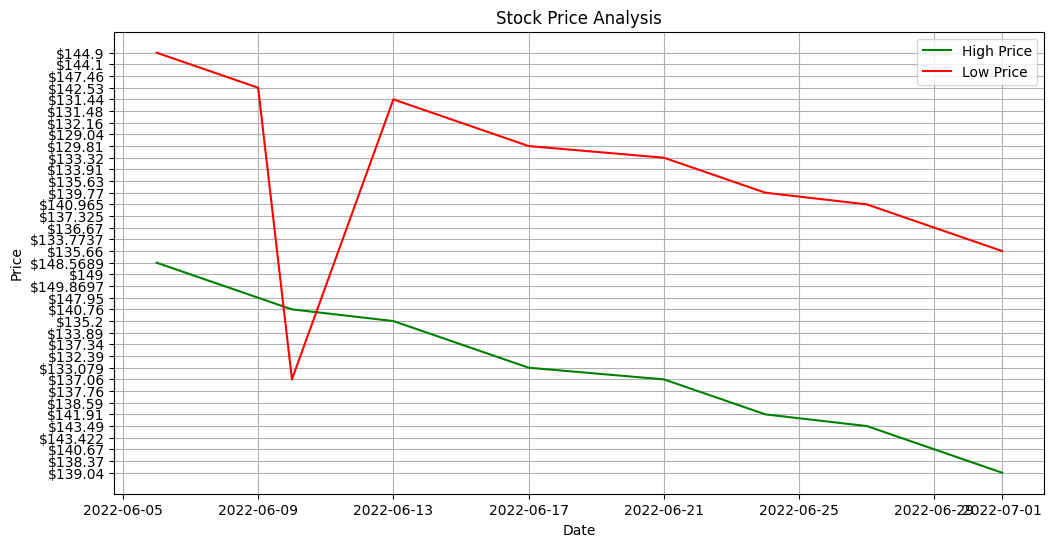

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers


df = pd.read_csv('1.csv')


dates = df['Date']
high_prices = df['High']
low_prices = df['Low']
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')


dates = pd.to_datetime(dates)
high_prices = np.array(high_prices)
low_prices = np.array(low_prices)


plt.figure(figsize=(12, 6))
plt.plot(dates, high_prices, label='High Price', color='green')
plt.plot(dates, low_prices, label='Low Price', color='red')
plt.title('Stock Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()





X = np.arange(len(dates)).reshape(-1, 1)
y = (high_prices + low_prices) / 2 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=16)



y_pred = model.predict(X_test)



plt.figure(figsize=(12, 6))
plt.plot(dates.iloc[X_test.flatten()], y_test, label='Actual Price', color='blue')
plt.plot(dates.iloc[X_test.flatten()], y_pred, label='Predicted Price', color='orange')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
